In [1]:
import numpy as np
import os
from hyperalg.distances import CheckOverlap
from hyperalg.utils import omp_get_thread_count, draw_circles, resize_box, gen_rand_coords
from numba import jit

In [2]:
@jit(nopython=True)
def randorg_kick(overlapping_particles, coords, stepsize):
    n = len(overlapping_particles)
    for i in range(n):
        j = ndim*overlapping_particles[i]
        randv = np.random.rand(ndim)-0.5
        coords[j:j+ndim] += stepsize*randv/np.linalg.norm(randv)
    return coords

In [3]:
os.environ["OMP_NUM_THREADS"] = "4"
omp_get_thread_count()

4

In [10]:
N = 10000
ndim = 2
phi=0.35
stepsize=2/3
radii = np.ones(N)
boxv = resize_box(phi, radii, np.ones(ndim))
co = CheckOverlap(radii, boxv, ncellx_scale=None, use_cell_lists=True)

ncellsx: 149.79969134027408, ncellsx_scale: 0.6675581178124544
('CheckOverlap setting ncellx_scale to value: ', 0.6675581178124544)


7542


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

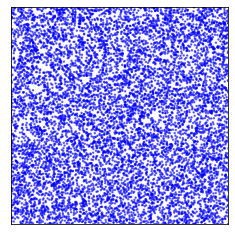

In [11]:
coords = boxv[0]*np.random.rand(ndim*N)
overlapping_particles = co.get_overlapping_particles(coords)
print(len(overlapping_particles))
draw_circles(coords, radii, boxv)

In [12]:
for _ in range(10000):
    overlapping_particles = co.get_overlapping_particles(coords)
    if len(overlapping_particles) == 0:
        break
    coords = randorg_kick(overlapping_particles, coords, stepsize)

0.0


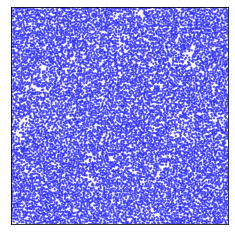

In [13]:
draw_circles(coords, radii, boxv)
overlapping_particles = co.get_overlapping_particles(coords)
print(len(overlapping_particles)/N)

In [7]:
a = [1, 2, 3, 4]
a[1:3]

[2, 3]